In [18]:
import configparser
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
config = configparser.ConfigParser()
config.read('dwh.cfg')
conn = psycopg2.connect("host={} dbname={} user={} password={} port={}".format(*config['CLUSTER'].values()))
cur = conn.cursor()

## 1. Number of Unique Users

In [20]:
cur.execute("""select count(*) from users;""")
user=cur.fetchall()

In [22]:
print(user[0][0])

6820


## 2. Most poular artists

In [6]:
query="""select a.name,count(*)
from songplays as s
join artists a
on s.artist_id=a.artist_id
group by a.name
order by 2 desc
limit 10;"""

In [7]:
cur.execute(query)

In [8]:
results = cur.fetchall()

In [9]:
print(results)

[('Kanye West', 62), ('Coldplay', 58), ('Kings Of Leon', 55), ('Usher', 52), ('Train', 50), ("O'Rosko Raricim", 49), ('Amy Winehouse', 48), ('Nate Dogg / Eminem / Obie Trice / Bobby Creekwater', 41), ('Eminem / Dr. Dre', 40), ('Eminem / 50 Cent', 39)]


In [10]:
type(results)

list

In [19]:
df=pd.DataFrame(results)

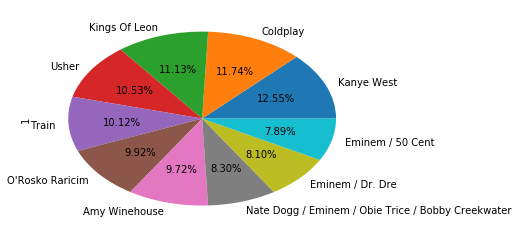

In [27]:
df[1].plot(kind='pie',labels=df[0],autopct='%1.2f%%');